In this notebook we have done the assumptions and statistical tests for our data.

The assumptions for chi-square are:
- Expected frequencies
- Independence

Assumptions for ttest and AVONA are:
- Independence
- Normality

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency #For two categorical variables
from scipy.stats import ttest_ind #For one categorical and one numeric
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import f_oneway

In [2]:
df=pd.read_excel('cleaned data.xlsx')
df

ID  age         job   marital  education  default  balance  \
0      15320   27    services   married  secondary        0      891   
1      43962   57  management  divorced   tertiary        0     3287   
2      29842   31  technician   married  secondary        0      119   
3      29390   33  management    single   tertiary        0        0   
4      40444   56     retired   married  secondary        0     1044   
...      ...  ...         ...       ...        ...      ...      ...   
30216  36483   29  management    single   tertiary        0        0   
30217  40178   53  management  divorced   tertiary        0      380   
30218  19710   32  management    single   tertiary        0      312   
30219  38556   57  technician   married  secondary        0      225   
30220  14156   55  management  divorced  secondary        0      204   

       housing loan  personal loan    contact  day month  duration  \
0                 1              0   cellular   18   jul       240   
1                 0              0   cellular   22   jun       867   
2                 1              0   cellular    4   feb       380   
3                 1              0   cellular    2   feb       116   
4                 0              0  telephone    3   jul       353   
...             ...            ...        ...  ...   ...       ...   
30216             1              0   cellular   12   may       116   
30217             0              1   cellular    5   jun       438   
30218             0              0   cellular    7   aug        37   
30219             1              0  telephone   15   may        22   
30220             1              0   cellular   11   jul      1973   

       duration in min.  campaign calls  pdays  previous poutcome  subscribed  
0              4.000000               1      0         0  unknown           0  
1             14.450000               1     84         3  success           1  
2              6.333333               1      0         0  unknown           0  
3              1.933333               3      0         0  unknown           0  
4              5.883333               2      0         0  unknown           1  
...                 ...             ...    ...       ...      ...         ...  
30216          1.933333               2      0         0  unknown           0  
30217          7.300000               2      0         0  unknown           1  
30218          0.616667               3      0         0  unknown           0  
30219          0.366667               7    337        12  failure           0  
30220         32.883333               2      0         0  unknown           1  

[30221 rows x 19 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30221 entries, 0 to 30220
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                30221 non-null  int64  
 1   age               30221 non-null  int64  
 2   job               30221 non-null  object 
 3   marital           30221 non-null  object 
 4   education         30221 non-null  object 
 5   default           30221 non-null  int64  
 6   balance           30221 non-null  int64  
 7   housing loan      30221 non-null  int64  
 8   personal loan     30221 non-null  int64  
 9   contact           30221 non-null  object 
 10  day               30221 non-null  int64  
 11  month             30221 non-null  object 
 12  duration          30221 non-null  int64  
 13  duration in min.  30221 non-null  float64
 14  campaign calls    30221 non-null  int64  
 15  pdays             30221 non-null  int64  
 16  previous          30221 non-null  int64 

# Assumptions & Normalization of 'balance' feature

<Axes: xlabel='balance', ylabel='Count'>

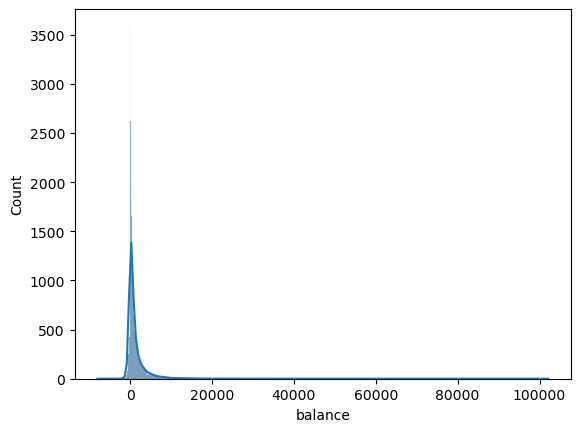

In [4]:
sns.histplot(data=df,x='balance',kde=True)

In [5]:
df_balance_norm=df[abs(zscore(df['balance']))<3]

<Axes: xlabel='balance', ylabel='Count'>

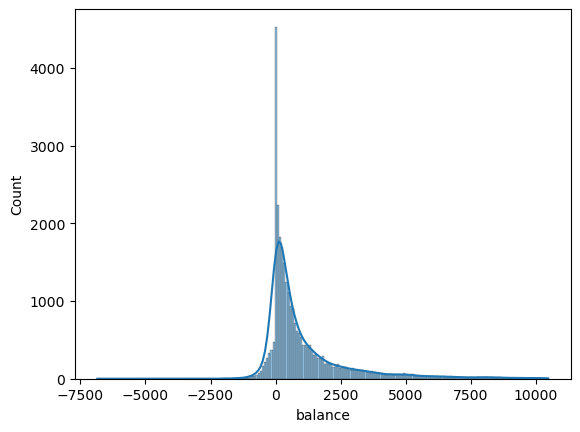

In [6]:
sns.histplot(data=df_balance_norm,x='balance',kde=True)

# Testing account balance with subscription

In [7]:
h0 = 'balance doesnt affect the subscribtion'
h1 = 'balance affects the subscribtion'

t_stat, p = ttest_ind(df_balance_norm.query('subscribed == 0')['balance'], df_balance_norm.query('subscribed == 1')['balance'])
if p < 0.05:
    print('p-value is {} so its less than 0.05 so we will reject the null hypothesis'.format(p))
else:
    print('p-value is {} so its more than 0.05 so we will accept the null hypothesis'.format(p))

p-value is 2.1071131012891054e-38 so its less than 0.05 so we will reject the null hypothesis


In [8]:
f_oneway(df_balance_norm.query('subscribed == 0')['balance'], df_balance_norm.query('subscribed == 1')['balance'])

F_onewayResult(statistic=168.3971513347774, pvalue=2.1071131012706897e-38)

# Assumptions & Normalization of 'duration' feature

<Axes: xlabel='duration', ylabel='Count'>

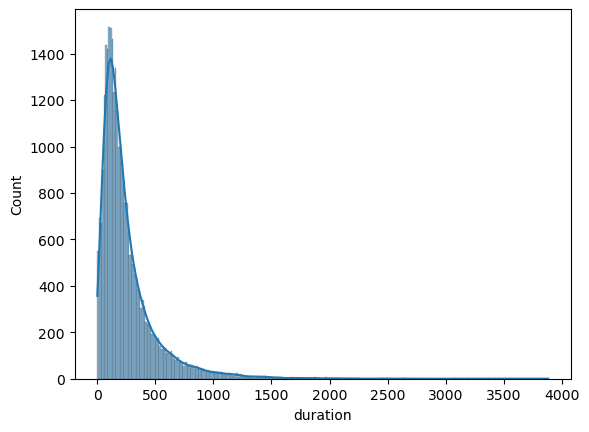

In [9]:
sns.histplot(data=df,x='duration',kde=True)

In [10]:
df_duration_norm=df[abs(zscore(df['duration']))<3]

<Axes: xlabel='duration', ylabel='Count'>

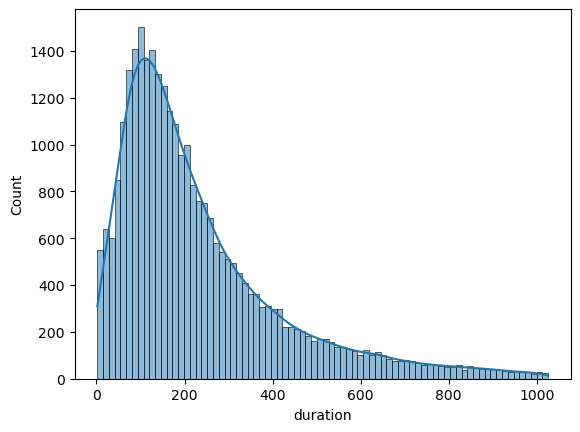

In [11]:
sns.histplot(data=df_duration_norm,x='duration',kde=True)

# Testing call duration with subscription

In [12]:
#Testing if the call duration has an effect on the subscribtion or not
h0 = 'longer or shorter calls doesnt affect subscribtion'
h1 = 'yes it has an effect'
t_stat, p = ttest_ind(df_duration_norm.query('subscribed == 0')['duration'], df_duration_norm.query('subscribed == 1')['duration'])
if p < 0.05:
    print('p-value is {} so its less than 0.05 so we will reject the null hypothesis'.format(p))
else:
    print('p-value is {} so its more than 0.05 so we will accept the null hypothesis'.format(p))

p-value is 0.0 so its less than 0.05 so we will reject the null hypothesis


# Assumptions & Normalization of 'campaign calls' feature

<Axes: xlabel='campaign calls', ylabel='Count'>

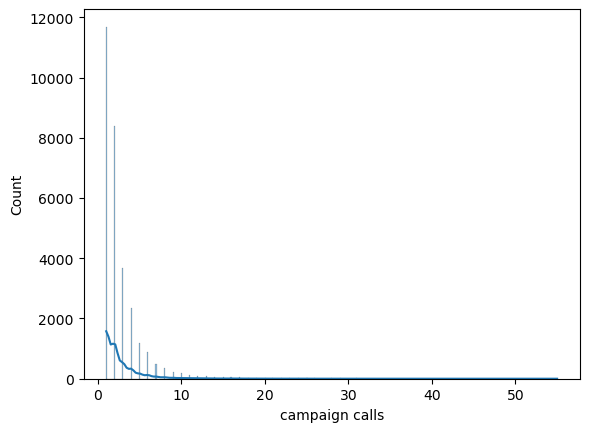

In [13]:
sns.histplot(data=df,x='campaign calls',kde=True)

<Axes: xlabel='campaign calls', ylabel='Count'>

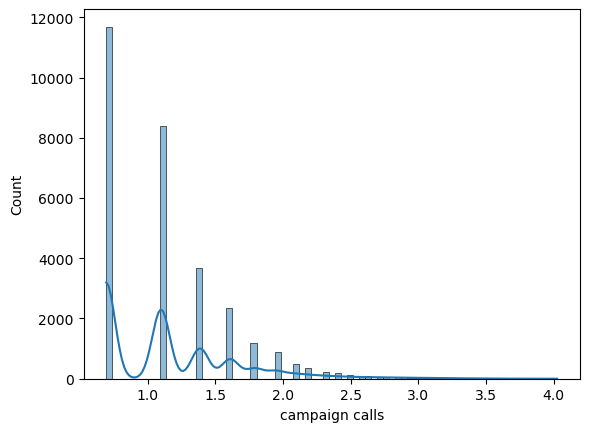

In [14]:
df['campaign calls']=np.log1p(df['campaign calls'])
sns.histplot(data=df,x='campaign calls',kde=True)

# Testing 'campaign call' with subscription

In [15]:
#Testing to see if the number of the calls during the campaign has an effect for subscrition or not
h0 = 'no, number of calls doesnt affect if the customer subscribes or not'
h1 = 'yess it has an effect'

t_test, p = ttest_ind(df.query('subscribed == 0')['campaign calls'], df.query('subscribed == 1')['campaign calls'])
if p < 0.05:
    print('p-value is {} so its less than 0.05 so we will reject the null hypothesis'.format(p))
else:
    print('p-value is {} so its more than 0.05 so we will accept the null hypothesis'.format(p))

p-value is 3.623238766731798e-46 so its less than 0.05 so we will reject the null hypothesis


# Testing 'day' with subscription

<Axes: xlabel='day', ylabel='Count'>

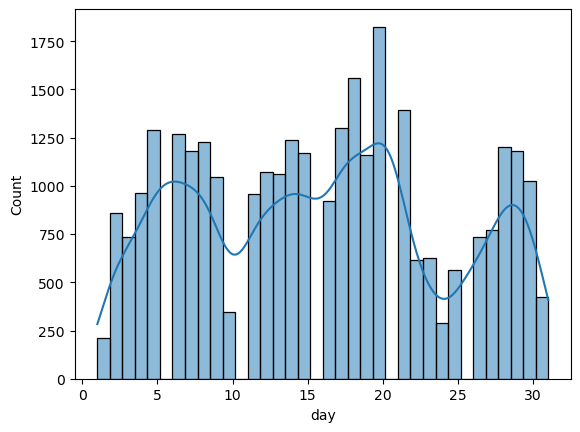

In [16]:
sns.histplot(data=df,x='day',kde=True)

In [17]:
#Testing to see if the number of day has an effect for subscrition or not
h0 = 'no, number of calls doesnt affect if the customer subscribes or not'
h1 = 'yess it has an effect'

t_test, p = ttest_ind(df.query('subscribed == 0')['day'], df.query('subscribed == 1')['day'])
if p < 0.05:
    print('p-value is {} so its less than 0.05 so we will reject the null hypothesis'.format(p))
else:
    print('p-value is {} so its more than 0.05 so we will accept the null hypothesis'.format(p))

p-value is 9.106470331835087e-08 so its less than 0.05 so we will reject the null hypothesis


# Assumptions & Normalization of 'previous' feature¶

<Axes: xlabel='previous', ylabel='Count'>

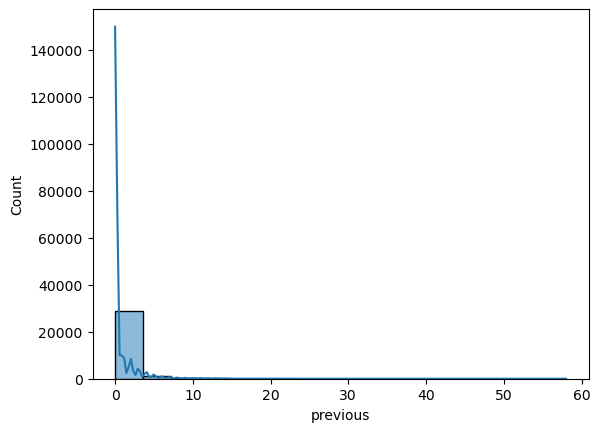

In [18]:
sns.histplot(data=df,x='previous',kde=True)

In [19]:
#Divide previous into bins
bins = [0, 1, 10, 20, 60]
labels = [1, 2, 3, 4]
df['previous'] = pd.cut(df['previous'], bins=bins, labels=labels)

In [20]:
#Contigency table for previous and subscription
contigency = pd.crosstab(df['previous'],df['subscribed'])

row_totals = contigency.sum(axis=1)
col_totals = contigency.sum(axis=0)
grand_total = contigency.sum().sum()

# Calculate the expected frequency table
exp_freq_table = np.outer(row_totals, col_totals) / grand_total

# Print the expected frequency table
print("Expected frequency table:\n", pd.DataFrame(exp_freq_table, index=contigency.index, columns=contigency.columns))

Expected frequency table:
 subscribed            0           1
previous                           
1           1410.662530  424.337470
2           2646.818032  796.181968
3            127.613068   38.386932
4             26.906370    8.093630


# Testing 'previous' with subscription

In [21]:
h0 = 'there is no relationship between the housing loan and subscribtion'
h1 = 'there is a relationship between the housing loan and subscribtion'
c, p, dof, expected = chi2_contingency(contigency)
if p < 0.05:
    print('p-value is {} so its less than 0.05 so we will reject the null hypothesis'.format(p))
else:
    print('p-value is {} so its more than 0.05 so we will accept the null hypothesis'.format(p))

p-value is 0.015201543479779303 so its less than 0.05 so we will reject the null hypothesis


# Assumptions & Normalization of 'pdays' feature

In [23]:
#Divide pdays into bins
bins = [-1, 0, 100, 180, 250, 350, 450, 872]
labels = [1, 2, 3, 4, 5, 6, 7]
df['pdays'] = pd.cut(df['pdays'], bins=bins, labels=labels)

In [24]:
df['pdays'].value_counts()

1    24742
5     1472
3     1151
4     1065
2      970
6      707
7      114
Name: pdays, dtype: int64

In [25]:
#Contigency table for pdays and subscription
contigency = pd.crosstab(df['pdays'],df['subscribed'])

row_totals = contigency.sum(axis=1)
col_totals = contigency.sum(axis=0)
grand_total = contigency.sum().sum()

# Calculate the expected frequency table
exp_freq_table = np.outer(row_totals, col_totals) / grand_total

# Print the expected frequency table
print("Expected frequency table:\n", pd.DataFrame(exp_freq_table, index=contigency.index, columns=contigency.columns))

Expected frequency table:
 subscribed             0            1
pdays                                
1           21854.437246  2887.562754
2             856.794282   113.205718
3            1016.670329   134.329671
4             940.707124   124.292876
5            1300.207405   171.792595
6             624.488204    82.511796
7             100.695410    13.304590


# Testing 'pdays' with subscription

In [26]:
h0 = 'there is no relationship between pdays and subscribtion'
h1 = 'there is a relationship between pdays and subscribtion'
c, p, dof, expected = chi2_contingency(contigency)
if p < 0.05:
    print('p-value is {} so its less than 0.05 so we will reject the null hypothesis'.format(p))
else:
    print('p-value is {} so its more than 0.05 so we will accept the null hypothesis'.format(p))

p-value is 0.0 so its less than 0.05 so we will reject the null hypothesis


# Assumptions & Normalization of 'housing loan' feature

In [27]:
#Contigency table for housing loan and subscription
contigency = pd.crosstab(df['housing loan'], df['subscribed'])
row_totals = contigency.sum(axis=1)
col_totals = contigency.sum(axis=0)
grand_total = contigency.sum().sum()

# Calculate the expected frequency table
exp_freq_table = np.outer(row_totals, col_totals) / grand_total

# Print the expected frequency table
print("Expected frequency table:\n", pd.DataFrame(exp_freq_table, index=contigency.index, columns=contigency.columns))


Expected frequency table:
 subscribed               0            1
housing loan                           
0             11689.500546  1544.499454
1             15004.499454  1982.500546


# Testing 'housing loan' with subscription

In [28]:
h0 = 'there is no relationship between the housing loan and subscribtion'
h1 = 'there is a relationship between the housing loan and subscribtion'
c, p, dof, expected = chi2_contingency(contigency)
if p < 0.05:
    print('p-value is {} so its less than 0.05 so we will reject the null hypothesis'.format(p))
else:
    print('p-value is {} so its more than 0.05 so we will accept the null hypothesis'.format(p))

p-value is 7.505705534951401e-131 so its less than 0.05 so we will reject the null hypothesis


# Assumptions & Normalization of 'personal loan' feature

In [29]:
#Contigency table for personal loan and subscription
contigency = pd.crosstab(df['personal loan'], df['subscribed'])
row_totals = contigency.sum(axis=1)
col_totals = contigency.sum(axis=0)
grand_total = contigency.sum().sum()

# Calculate the expected frequency table
exp_freq_table = np.outer(row_totals, col_totals) / grand_total

# Print the expected frequency table
print("Expected frequency table:\n", pd.DataFrame(exp_freq_table, index=contigency.index, columns=contigency.columns))


Expected frequency table:
 subscribed                0            1
personal loan                           
0              22254.569008  2940.430992
1               4439.430992   586.569008


# Testing 'personal loan' with subscription

In [30]:
h0 = 'there is no relationship between personal loan and subscribtion'
h1 = 'there is a relationship between personal loan and subscribtion'
c, p, dof, expected = chi2_contingency(contigency)
if p < 0.05:
    print('p-value is {} so its less than 0.05 so we will reject the null hypothesis'.format(p))
else:
    print('p-value is {} so its more than 0.05 so we will accept the null hypothesis'.format(p))

p-value is 1.0142174697041268e-36 so its less than 0.05 so we will reject the null hypothesis


# Assumptions & Normalization of 'default' feature

In [31]:
#Contigency table for default and subscription
contigency = pd.crosstab(df['default'], df['subscribed'])
row_totals = contigency.sum(axis=1)
col_totals = contigency.sum(axis=0)
grand_total = contigency.sum().sum()

# Calculate the expected frequency table
exp_freq_table = np.outer(row_totals, col_totals) / grand_total

# Print the expected frequency table
print("Expected frequency table:\n", pd.DataFrame(exp_freq_table, index=contigency.index, columns=contigency.columns))


Expected frequency table:
 subscribed             0            1
default                              
0           26199.355878  3461.644122
1             494.644122    65.355878


# Testing 'default' with subscription

In [32]:
h0 = 'there is no relationship between default and subscribtion'
h1 = 'there is a relationship between default and subscribtion'
c, p, dof, expected = chi2_contingency(contigency)
if p < 0.05:
    print('p-value is {} so its less than 0.05 so we will reject the null hypothesis'.format(p))
else:
    print('p-value is {} so its more than 0.05 so we will accept the null hypothesis'.format(p))

p-value is 0.00035992746722727224 so its less than 0.05 so we will reject the null hypothesis


# Assumptions & Normalization of 'poutcome' feature

In [36]:
#Contigency table for poutcome and subscription
contingency_table = pd.crosstab(df['poutcome'], df['subscribed'])
row_totals = contingency_table.sum(axis=1)
col_totals = contingency_table.sum(axis=0)
grand_total = contingency_table.sum().sum()

# Calculate the expected frequency table
exp_freq_table = np.outer(row_totals, col_totals) / grand_total

# Print the expected frequency table
print("Expected frequency table:\n", pd.DataFrame(exp_freq_table, index=contingency_table.index, columns=contingency_table.columns))


Expected frequency table:
 subscribed             0            1
poutcome                             
failure      2847.736872   376.263128
other        1099.699878   145.300122
success       887.709540   117.290460
unknown     21858.853711  2888.146289


# Testing 'poutcome' with subscription

In [35]:
h0 = 'no it has no effect'
h1 = 'yess it has an effect'

c, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print('p-value is {} so its less than 0.05 so we will reject the null hypothesis'.format(p))
else:
    print('p-value is {} so its more than 0.05 so we will accept the null hypothesis'.format(p))

p-value is 0.0 so its less than 0.05 so we will reject the null hypothesis


# Assumptions & Normalization of 'education' feature

In [37]:
#Contigency table for education and subscription
contingency_table = pd.crosstab(df['education'], df['subscribed'])
row_totals = contingency_table.sum(axis=1)
col_totals = contingency_table.sum(axis=0)
grand_total = contingency_table.sum().sum()

# Calculate the expected frequency table
exp_freq_table = np.outer(row_totals, col_totals) / grand_total

# Print the expected frequency table
print("Expected frequency table:\n", pd.DataFrame(exp_freq_table, index=contingency_table.index, columns=contingency_table.columns))


Expected frequency table:
 subscribed             0            1
education                            
primary      4213.307965   556.692035
secondary   14287.265478  1887.734522
tertiary     8193.426558  1082.573442


# Testing 'education' with subscription

In [38]:
h0 = 'no it has no effect'
h1 = 'yess it has an effect'

c, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print('p-value is {} so its less than 0.05 so we will reject the null hypothesis'.format(p))
else:
    print('p-value is {} so its more than 0.05 so we will accept the null hypothesis'.format(p))

p-value is 4.0328021474167605e-38 so its less than 0.05 so we will reject the null hypothesis


# Assumptions & Normalization of 'marital' feature

In [39]:
#Contigency table for marital and subscription
contingency_table = pd.crosstab(df['marital'], df['subscribed'])
row_totals = contingency_table.sum(axis=1)
col_totals = contingency_table.sum(axis=0)
grand_total = contingency_table.sum().sum()

# Calculate the expected frequency table
exp_freq_table = np.outer(row_totals, col_totals) / grand_total

# Print the expected frequency table
print("Expected frequency table:\n", pd.DataFrame(exp_freq_table, index=contingency_table.index, columns=contingency_table.columns))

Expected frequency table:
 subscribed             0            1
marital                              
divorced     3085.342709   407.657291
married     16085.650177  2125.349823
single       7523.007114   993.992886


# Testing 'marital' with subscription

In [40]:
h0 = 'no it has no effect'
h1 = 'yess it has an effect'

c, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print('p-value is {} so its less than 0.05 so we will reject the null hypothesis'.format(p))
else:
    print('p-value is {} so its more than 0.05 so we will accept the null hypothesis'.format(p))

p-value is 9.282612714140576e-33 so its less than 0.05 so we will reject the null hypothesis


# Assumptions & Normalization of 'contact' feature

In [41]:
#Contigency table for contact and subscription
contingency_table = pd.crosstab(df['contact'], df['subscribed'])
row_totals = contingency_table.sum(axis=1)
col_totals = contingency_table.sum(axis=0)
grand_total = contingency_table.sum().sum()

# Calculate the expected frequency table
exp_freq_table = np.outer(row_totals, col_totals) / grand_total

# Print the expected frequency table
print("Expected frequency table:\n", pd.DataFrame(exp_freq_table, index=contingency_table.index, columns=contingency_table.columns))


Expected frequency table:
 subscribed             0            1
contact                              
cellular    17368.191721  2294.808279
other        7654.617782  1011.382218
telephone    1671.190497   220.809503


# Testing 'marital' with subscription

In [42]:
h0 = 'no it has no effect'
h1 = 'yess it has an effect'

c, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print('p-value is {} so its less than 0.05 so we will reject the null hypothesis'.format(p))
else:
    print('p-value is {} so its more than 0.05 so we will accept the null hypothesis'.format(p))

p-value is 1.4859498942272372e-145 so its less than 0.05 so we will reject the null hypothesis


# Assumptions & Normalization of 'month' feature

In [43]:
#Contigency table for month and subscription
contingency_table = pd.crosstab(df['month'], df['subscribed'])
row_totals = contingency_table.sum(axis=1)
col_totals = contingency_table.sum(axis=0)
grand_total = contingency_table.sum().sum()

# Calculate the expected frequency table
exp_freq_table = np.outer(row_totals, col_totals) / grand_total

# Print the expected frequency table
print("Expected frequency table:\n", pd.DataFrame(exp_freq_table, index=contingency_table.index, columns=contingency_table.columns))

Expected frequency table:
 subscribed            0            1
month                               
apr         1746.270408   230.729592
aug         3700.114688   488.885312
dec          132.493961    17.506039
feb         1544.879587   204.120413
jan          806.446577   106.553423
jul         4083.463883   539.536117
jun         3079.159657   406.840343
mar          282.653784    37.346216
may         8182.827041  1081.172959
nov         2382.241422   314.758578
oct          421.330796    55.669204
sep          332.118196    43.881804


# Testing 'month' with subscription

In [44]:
h0 = 'no it has no effect'
h1 = 'yess it has an effect'

c, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print('p-value is {} so its less than 0.05 so we will reject the null hypothesis'.format(p))
else:
    print('p-value is {} so its more than 0.05 so we will accept the null hypothesis'.format(p))

p-value is 0.0 so its less than 0.05 so we will reject the null hypothesis


# Assumptions & Normalization of 'job' feature

In [45]:
#Contigency table for job and subscription
contingency_table = pd.crosstab(df['job'], df['subscribed'])
row_totals = contingency_table.sum(axis=1)
col_totals = contingency_table.sum(axis=0)
grand_total = contingency_table.sum().sum()

# Calculate the expected frequency table
exp_freq_table = np.outer(row_totals, col_totals) / grand_total

# Print the expected frequency table
print("Expected frequency table:\n", pd.DataFrame(exp_freq_table, index=contingency_table.index, columns=contingency_table.columns))


Expected frequency table:
 subscribed               0           1
job                                   
admin.         3106.541742  410.458258
blue-collar    5756.420966  760.579034
entrepreneur    841.778300  111.221700
housemaid       741.966182   98.033818
management     5716.672777  755.327223
retired        1317.873267  174.126733
self-employed   964.556037  127.443963
services       2474.103901  326.896099
student         456.662519   60.337481
technician     4533.943351  599.056649
unemployed      783.480957  103.519043


# Testing 'job' with subscription

In [46]:
h0 = 'no it has no effect'
h1 = 'yess it has an effect'

c, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print('p-value is {} so its less than 0.05 so we will reject the null hypothesis'.format(p))
else:
    print('p-value is {} so its more than 0.05 so we will accept the null hypothesis'.format(p))

p-value is 1.778118054068248e-108 so its less than 0.05 so we will reject the null hypothesis
